<a href="https://colab.research.google.com/github/sunujoseph/CSCI4050ML/blob/master/Copy_of_CSCI_4050U_lecture_2019_11_13_RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [ ]:
import sklearn.datasets
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as pl

# Making a dataset for binary classification

This dataset cannot be linearly separated.

In [ ]:
x_train, y_train = sklearn.datasets.make_moons(1000, noise=0.15)

In [ ]:
x_train.shape, y_train.shape

((1000, 2), (1000,))

In [ ]:
x0_train = x_train[y_train == 0]
x1_train = x_train[y_train == 1]

In [ ]:
x0_train.shape, x1_train.shape, x_train.dtype

((500, 2), (500, 2), dtype('float64'))

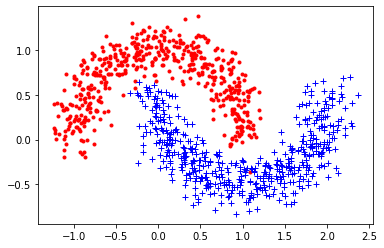

In [ ]:
pl.plot(x0_train[:, 0], x0_train[:, 1], '.', color='red')
pl.plot(x1_train[:, 0], x1_train[:, 1], '+', color='blue');

# Keras Radial Basis Function layer

In [ ]:
def rbf(x, c, b):
  # x: (None, 2)
  # c: (k, 2)
  # b: (k,)
  x2 = tf.reshape(x, (-1, 1, 2))
  c2 = tf.reshape(c, (1, -1, 2))
  diff = x2 - c2                  # : (None, k, 2)
  dist = tf.pow(tf.norm(diff, axis=2), 2)
  return tf.exp(-dist / 2 / tf.reshape(b, (1, -1)))

In [ ]:
class RBFLayer(K.layers.Layer):
  def __init__(self, k, *E, **F):
    super(RBFLayer, self).__init__(*E, **F)
    self.k = k
    self.c = tf.Variable(np.random.randn(k, 2), dtype=tf.float32)
    self.b = tf.Variable(np.random.randn(k), dtype=tf.float32)
  def call(self, x_in):
    return rbf(x_in, self.c, self.b)

In [ ]:
model = K.models.Sequential([
    K.layers.Input((2,)),
    RBFLayer(5),
    K.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rbf_layer (RBFLayer)         (None, 5)                 15        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.count_params()

21

In [ ]:
model.compile(optimizer='adam', loss=tf.losses.binary_crossentropy, metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, verbose=False)

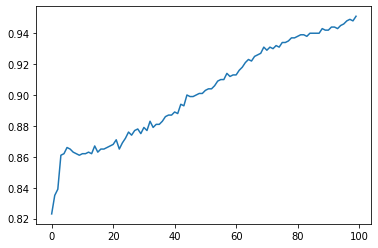

In [ ]:
pl.plot(history.history['acc']);

# Visualizing the separation boundary

In [ ]:
min = np.min(x_train, axis=0)
max = np.max(x_train, axis=0)

In [ ]:
xx, yy = np.meshgrid(np.linspace(min[0], max[0], 100),
                     np.linspace(min[1], max[1], 100))
grid = np.hstack([np.reshape(xx, (-1, 1)),
                  np.reshape(yy, (-1, 1))])
z = model.predict(grid)
z = np.reshape(z, (100, 100))

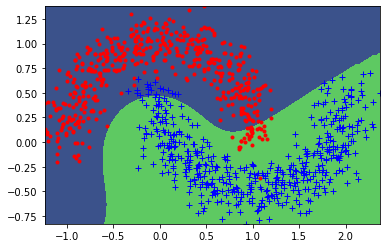

In [ ]:
pl.contourf(xx, yy, z, levels=[0, 0.5, 1.0]);
pl.plot(x0_train[:, 0], x0_train[:, 1], '.', color='red')
pl.plot(x1_train[:, 0], x1_train[:, 1], '+', color='blue');

# Appendix: on numpy / tensorflow broadcast

In [ ]:
A = np.reshape(np.arange(1, 7), (2, 3))
A

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
B = np.reshape(np.arange(1, 9) * 10, (4, 2))
B

array([[10, 20],
       [30, 40],
       [50, 60],
       [70, 80]])

In [ ]:
C = np.array([10, 20, 30])
D = np.array([10, 20])

In [ ]:
C2 = np.reshape(C, (1, 3))

In [ ]:
A.shape, C2.shape

((2, 3), (1, 3))

In [ ]:
A + C2

array([[11, 22, 33],
       [14, 25, 36]])

In [ ]:
A.shape, D.shape

((2, 3), (2,))

In [ ]:
D2 = np.reshape(D, (2, 1))

In [ ]:
A.shape, D2.shape

((2, 3), (2, 1))

In [ ]:
A + D2

array([[11, 12, 13],
       [24, 25, 26]])

In [ ]:
A.shape, B.shape

((2, 3), (4, 2))

In [ ]:
B.reshape((1, 4, 2)).shape

(1, 4, 2)

In [ ]:
A2 = np.reshape(np.transpose(A), (3, 1, 2))
B2 = np.reshape(B, (1, 4, 2))

In [ ]:
A2.shape, B2.shape

((3, 1, 2), (1, 4, 2))

In [ ]:
(A2 + B2).shape

(3, 4, 2)